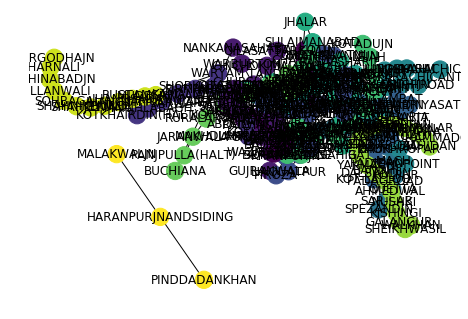

In [35]:
# taken from https://stackoverflow.com/questions/43541376/how-to-draw-communities-with-networkx/43541777
# you need to install louvain package by using the following command
# pip install python-louvain --user


def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

from community import community_louvain
partition = community_louvain.best_partition(ug)
pos = community_layout(ug, partition)
cols = [float(i) for i in partition.values()]
nx.draw(ug,pos, node_color=cols, with_labels=True); 
plt.show()

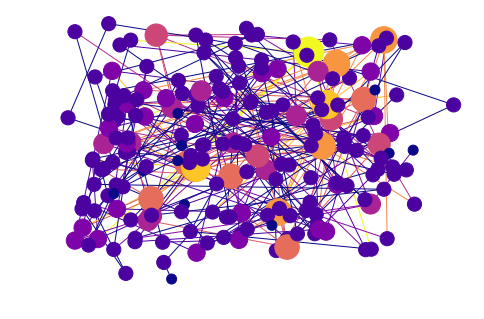

In [28]:
# set color and size of nodes as per degree of each node


d = [] # create a set
for n in ug.nodes():
    d.append(ug.degree(n))
    
ec = [] # create a set
for e in ug.edges():
    if(ug.degree(e[0]) > ug.degree(e[1])):
        ec.append(ug.degree(e[0]))
    else:
        ec.append(ug.degree(e[1]))
    
pos = nx.spring_layout(ug, iterations=1)

factor = 100 # to change the size of nodes with respect to their degree


# choose color plate from https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# example: viridis
nx.draw(ug, pos,
        edge_color = ec,  edge_cmap=plt.cm.plasma,  # edge color
        node_color = d, cmap=plt.cm.plasma, # node color
        node_size=[x * factor for x in d]) # node sizse

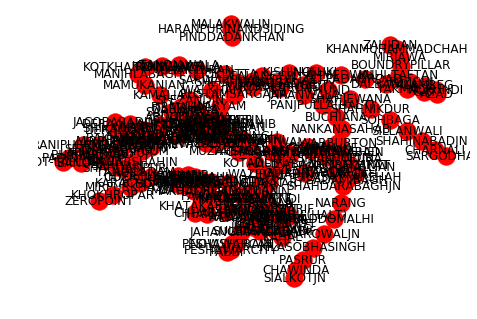

In [33]:
# draw a network with labels
options = {
    'node_color': 'Green',
    'node_size': 0.00000001,
    'line_color': 'Yellow',
    'linewidths': 0.00001,
    'width': 0.1,
}
nx.draw(ug, with_labels=True)

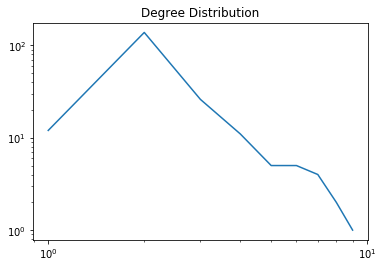

In [16]:
# taken from SNAP Tutorial
def plot_degree_distribution (wiki) :
    degs = {}
    for n in wiki.nodes () :
        deg = wiki.degree ( n )
        
        
        if deg not in degs :
            degs [ deg ] = 0
        
        degs [ deg ] += 1
    items = sorted ( degs.items () )
            
    fig = plt.figure ()
    ax = fig.add_subplot (111)
    ax.plot ([ k for (k , v ) in items ] , [ v for (k ,v ) in items ])
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.title("Degree Distribution")
    fig.savefig ("degree_distribution.png")
    
            
plot_degree_distribution(ug)

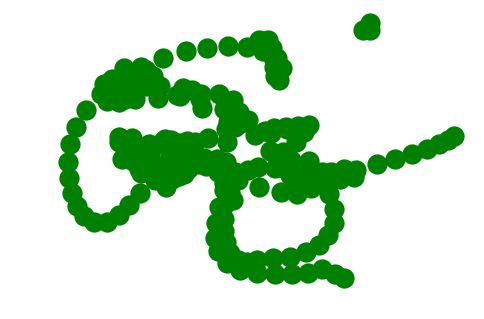

In [15]:
options = {
    'node_color': 'Green',
    'node_size': 150,
    'line_color': 'Blue',
    'linewidths': 8,
    'width': 0.1,
}
nx.draw(ug, **options)
plt.savefig ("simple_graph.png")

In [36]:
# basic analysis

# number of nodes
print("number of noeds:",nx.number_of_nodes(ug))

#number of edges
print("number of edges:",nx.number_of_edges(ug))

#average clustering
nx.average_clustering(ug)

# diameter
print("Diameter:",nx.diameter(ug))
# this diameter shows ...

# average degree
sum = 0
for n in ug.nodes():
    sum = sum + ug.degree(n)
print("Average degree:", sum/ug.number_of_nodes())

number of noeds: 204
number of edges: 259


NetworkXError: Found infinite path length because the graph is not connected

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import community
# read edge list
g = nx.read_edgelist("edge.txt")
ug = nx.to_undirected(g)
# print basic info (is the graph ok?)
print(nx.info(ug))

Name: 
Type: Graph
Number of nodes: 204
Number of edges: 259
Average degree:   2.5392


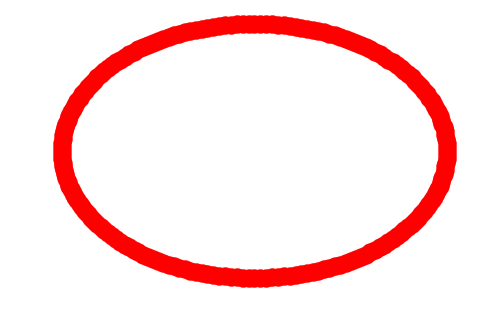

Name: 
Type: Graph
Number of nodes: 204
Number of edges: 203
Average degree:   1.9902


In [45]:
import matplotlib.pyplot as plt
import networkx as nx
a=nx.read_edgelist("edge.txt")
G = nx.path_graph(a)
nx.draw_circular(G)
plt.show()
ug = nx.to_undirected(G)
print(nx.info(ug))